In [ ]:
import numpy as np
import pandas as p
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from collections import Counter

/Users/Mazarinetulp/Documents/nlpass2/NLP_group_9/NLP/.venv/bin/python
scikit-learn              1.5.2


In [4]:

df = pd.read_parquet('data/processed/preprocessed_df.parquet')

print(df.preprocessed_content[:5])

24    [ecb, effect, move, euro, huge, falling, pip, ...
32    [stock, watch, march, trading, session, stock,...
57    [rout, apple, facebook, nasdaq, fb, monday, sw...
78    [immediate, releasechicago, il, january, annou...
82    [company, bringing, innovation, ce, jan, get, ...
Name: preprocessed_content, dtype: object


In [ ]:

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
file_path = 'nlp/data/raw/us_equities_news_dataset.csv'
articles = pd.read_csv(file_path)
articles['content'] = articles['content'].astype(str)  # Convert 'content' column to string
articles['title'] = articles['title'].str.lower()
articles['content'] = articles['content'].str.lower()

# Filter for articles mentioning Nvidia
nvidia_articles = articles[articles['title'].str.contains('nvidia') | articles['content'].str.contains('nvidia')].copy()

articles.head()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Mazarinetulp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Mazarinetulp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Mazarinetulp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,why shares of chinese electric car maker nio a...,news,what s happening\nshares of chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,nio only consumer gainer workhorse group amon...,news,gainers nio nyse nio 7 \nlosers mgp ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,nio leads consumer gainers beyond meat and ma...,news,gainers nio nyse nio 14 village farms in...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,nio nvax among premarket gainers,news,cemtrex nasdaq cetx 85 after fy results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,plug nio among premarket gainers,news,atyr pharma nasdaq life 63 on kyorin pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096


In [13]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens  # Returning tokens for topic modeling

# Apply preprocessing
nvidia_articles['processed_content'] = nvidia_articles['content'].apply(preprocess_text)


In [14]:
#store the original preprocessed texts for comparison seperately
original_processed_texts = nvidia_articles['processed_content'].tolist()


In [15]:
from FuzzyTM import FLSA_W
flsaW = FLSA_W(
input_file = original_processed_texts,
num_topics=10,
num_words=10,
)

pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL

# Display topics and evaluation metrics
print(flsaW.show_topics())
print("Vocabulary Size:", flsaW.get_vocabulary_size())
print("Coherence Score:", flsaW.get_coherence_score())
print("Diversity Score:", flsaW.get_diversity_score())
print("Interpretability Score:", flsaW.get_interpretability_score())

for topic in flsaW.show_topics(representation='words'):
    print(topic)


[(0, '0.0018*"chipmaker" + 0.0018*"hottest" + 0.0018*"composite" + 0.0018*"rose" + 0.0017*"phenomenon" + 0.0017*"reuters" + 0.0016*"session" + 0.0016*"spotlight" + 0.0016*"rival" + 0.0016*"vehicle"'), (1, '0.001*"gmt" + 0.0009*"performer" + 0.0008*"towards" + 0.0007*"incorporated" + 0.0007*"miner" + 0.0007*"vector" + 0.0007*"alllast" + 0.0007*"citigroup" + 0.0007*"realization" + 0.0007*"avoided"'), (2, '0.0073*"nvda" + 0.0068*"nvidia" + 0.0058*"nyse" + 0.0055*"hold" + 0.0052*"best" + 0.0052*"recent" + 0.0052*"likely" + 0.0051*"day" + 0.0051*"top" + 0.0051*"zacks"'), (3, '0.0038*"art" + 0.0037*"newest" + 0.0034*"roundup" + 0.0033*"tied" + 0.0033*"becoming" + 0.0032*"doubt" + 0.0032*"restriction" + 0.0031*"editing" + 0.003*"persist" + 0.003*"innovator"'), (4, '0.0006*"premarket" + 0.0004*"randewich" + 0.0004*"noel" + 0.0003*"divide" + 0.0003*"qrvo" + 0.0003*"pct" + 0.0003*"staged" + 0.0003*"colette" + 0.0003*"vlkay" + 0.0003*"daign"'), (5, '0.0012*"cryptocurrency" + 0.0011*"matras" + 0.0

In [17]:
from collections import Counter


#More iterations and additions to preprocessing steps to see if these steps influence Coherence score 
def remove_high_frequency_words(texts, top_n_percent=5):
    word_freq = Counter([word for sentence in texts for word in sentence])
    top_n = set(word for word, _ in word_freq.most_common(int(top_n_percent / 100 * len(word_freq))))
    return [[word for word in sentence if word not in top_n] for sentence in texts]

def remove_low_frequency_words(texts, bottom_n_percent=5):
    word_freq = Counter([word for sentence in texts for word in sentence])
    bottom_n = set(word for word, _ in word_freq.most_common()[:-int(bottom_n_percent / 100 * len(word_freq)) - 1:-1])
    return [[word for word in sentence if word not in bottom_n] for sentence in texts]

def filter_top_bottom_words(processed_texts, n=5):
    word_freq = Counter([word for sentence in processed_texts for word in sentence])
    top_n = set(word for word, _ in word_freq.most_common(int(n / 100 * len(word_freq))))
    bottom_n = set(word for word, _ in word_freq.most_common()[:-int(n / 100 * len(word_freq)) - 1:-1])
    filtered_texts = [[word for word in sentence if word not in top_n and word not in bottom_n] for sentence in processed_texts]
    return filtered_texts


# Store preprocessing variations and their descriptions
preprocessing_steps = {
    "Original Preprocessing": original_processed_texts,
    "Remove High-Frequency Words": remove_high_frequency_words(original_processed_texts, top_n_percent=5),
    "Remove Low-Frequency Words": remove_low_frequency_words(original_processed_texts, bottom_n_percent=5),
    "Filter Top and Bottom 5% Words": filter_top_bottom_words(original_processed_texts, n=5)
}

# Dictionary to hold coherence scores for each preprocessing step
coherence_scores = {}

# Train the FLSA-W model and calculate coherence scores for each preprocessing step
for description, processed_texts in preprocessing_steps.items():
    # Filter out empty texts after preprocessing
    processed_texts = [text for text in processed_texts if len(text) > 0]
    
    # Train FLSA-W model
    flsaW = FLSA_W(input_file=processed_texts, num_topics=10, num_words=10)
    flsaW.get_matrices()
    
    # Calculate and store coherence score
    coherence_score = flsaW.get_coherence_score()
    coherence_scores[description] = coherence_score
    
    # Print coherence score for each step
    print(f"{description} - Coherence Score: {coherence_score}")



Original Preprocessing - Coherence Score: 0.40750845980405986
Remove High-Frequency Words - Coherence Score: 0.33407318437808897
Remove Low-Frequency Words - Coherence Score: 0.4078016106232714
Filter Top and Bottom 5% Words - Coherence Score: 0.3244597785317037


In [20]:
bottom_n_percent_values = [5, 10, 15, 20]

# Dictionary to hold coherence scores for each bottom_n_percent
coherence_scores_lowfreq = {}

# Loop through each threshold and calculate coherence score
for bottom_n_percent in bottom_n_percent_values:
    # Apply low-frequency filtering with the current threshold
    lowfreq_filtered_texts = remove_low_frequency_words(original_processed_texts, bottom_n_percent=bottom_n_percent)
    
    # Train the FLSA-W model with the filtered texts
    flsaW = FLSA_W(input_file=lowfreq_filtered_texts, num_topics=10, num_words=10)
    flsaW.get_matrices()  # Train the model to get topic distributions
    
    # Calculate coherence score and store it
    coherence_score = flsaW.get_coherence_score()
    coherence_scores_lowfreq[bottom_n_percent] = coherence_score
    
    # Display the coherence score for each bottom_n_percent
    print(f"Bottom {bottom_n_percent}% Low-Frequency Removal - Coherence Score: {coherence_score}")

# Display all coherence scores for low-frequency filtering comparison
print("\nComparison of Coherence Scores for Different Bottom n% Values:")
for bottom_n_percent, score in coherence_scores_lowfreq.items():
    print(f"Bottom {bottom_n_percent}% Low-Frequency Words Removed: Coherence Score = {score}")

# Choose the best bottom_n_percent based on the highest coherence score
best_bottom_n_percent = max(coherence_scores_lowfreq, key=coherence_scores_lowfreq.get)
print(f"\nBest Bottom n% for Low-Frequency Removal: {best_bottom_n_percent}% with Coherence Score: {coherence_scores_lowfreq[best_bottom_n_percent]}")

Bottom 5% Low-Frequency Removal - Coherence Score: 0.34279595965485515
Bottom 10% Low-Frequency Removal - Coherence Score: 0.41421585744671396
Bottom 15% Low-Frequency Removal - Coherence Score: 0.4165983750761785
Bottom 20% Low-Frequency Removal - Coherence Score: 0.3935886883087519

Comparison of Coherence Scores for Different Bottom n% Values:
Bottom 5% Low-Frequency Words Removed: Coherence Score = 0.34279595965485515
Bottom 10% Low-Frequency Words Removed: Coherence Score = 0.41421585744671396
Bottom 15% Low-Frequency Words Removed: Coherence Score = 0.4165983750761785
Bottom 20% Low-Frequency Words Removed: Coherence Score = 0.3935886883087519

Best Bottom n% for Low-Frequency Removal: 15% with Coherence Score: 0.4165983750761785


In [21]:

# Apply filtering of low frequency words because that got the best coherence score
lowfreq_filtered_texts = remove_low_frequency_words(original_processed_texts, bottom_n_percent=15)


flsaW2 = FLSA_W(input_file=lowfreq_filtered_texts, num_topics=10, num_words=10)
pwgt, ptgd = flsaW2.get_matrices()

# Display topics and evaluation metrics
print(flsaW2.show_topics())
print("Vocabulary Size:", flsaW2.get_vocabulary_size())
print("Coherence Score:", flsaW2.get_coherence_score())
print("Diversity Score:", flsaW2.get_diversity_score())
print("Interpretability Score:", flsaW2.get_interpretability_score())

for topic in flsaW2.show_topics(representation='words'):
    print(topic)

[(0, '0.0008*"gmt" + 0.0007*"outnumbered" + 0.0007*"settle" + 0.0006*"slumped" + 0.0005*"dax" + 0.0005*"vaneck" + 0.0005*"advancer" + 0.0005*"strategiesit" + 0.0005*"deadly" + 0.0005*"flashpoint"'), (1, '0.0071*"nvda" + 0.0067*"nvidia" + 0.0055*"nyse" + 0.0052*"hold" + 0.0052*"best" + 0.005*"top" + 0.005*"day" + 0.005*"recent" + 0.0049*"nasdaq" + 0.0049*"past"'), (2, '0.0007*"premarket" + 0.0005*"troy" + 0.0004*"smh" + 0.0004*"kem" + 0.0004*"kemet" + 0.0004*"nellis" + 0.0004*"qrvo" + 0.0004*"mcqueeney" + 0.0004*"polled" + 0.0004*"randewich"'), (3, '0.0003*"delisting" + 0.0003*"supervisory" + 0.0003*"whileolympusshares" + 0.0003*"upnoteus" + 0.0003*"equitiesasian" + 0.0002*"reiterates" + 0.0002*"icera" + 0.0002*"pcg" + 0.0002*"chee" + 0.0002*"foo"'), (4, '0.0017*"reuters" + 0.0015*"chipmaker" + 0.0015*"hottest" + 0.0014*"composite" + 0.0014*"sporting" + 0.0014*"rose" + 0.0014*"blast" + 0.0014*"combination" + 0.0013*"rival" + 0.0013*"bell"'), (5, '0.0027*"corporation" + 0.0027*"broader" 

Number of topics: 2, Coherence Score: 0.41331857888146667
Number of topics: 3, Coherence Score: 0.3881933472849369
Number of topics: 4, Coherence Score: 0.4807494144085653
Number of topics: 5, Coherence Score: 0.4313974881048869
Number of topics: 6, Coherence Score: 0.405325038226042
Number of topics: 7, Coherence Score: 0.37352063829428656
Number of topics: 8, Coherence Score: 0.3448664656544842
Number of topics: 9, Coherence Score: 0.37167024658735365
Number of topics: 10, Coherence Score: 0.35085695063515937
Number of topics: 11, Coherence Score: 0.38071795064003244
Number of topics: 12, Coherence Score: 0.3669249843315428
Number of topics: 13, Coherence Score: 0.39348189273267764
Number of topics: 14, Coherence Score: 0.368082460620284
Number of topics: 15, Coherence Score: 0.34782270730531645
Number of topics: 16, Coherence Score: 0.38055892522114276
Number of topics: 17, Coherence Score: 0.3579867563272451
Number of topics: 18, Coherence Score: 0.3664817986994425
Number of topics

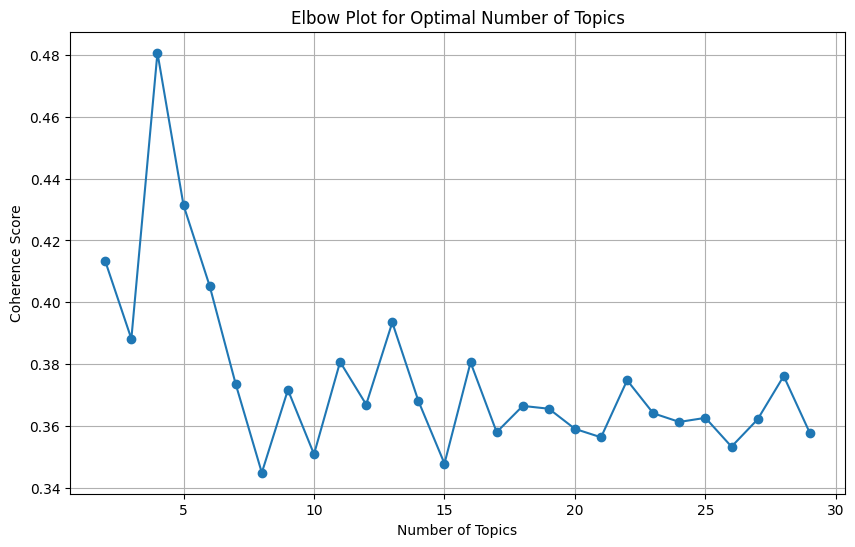

In [22]:
import matplotlib.pyplot as plt

# Define the range of topics to test
topic_numbers = range(2, 30)  # Testing from 2 to 30 topics
coherence_scores = []

# Loop over each topic number and train a model
for num_topics in topic_numbers:
    # Train the FLSA-W model with the current number of topics
    model = FLSA_W(input_file=lowfreq_filtered_texts, num_topics=num_topics, num_words=10)
    model.get_matrices()  # Train the model to get topic distributions
    
    # Get coherence score for the current model
    coherence_score = model.get_coherence_score()
    coherence_scores.append(coherence_score)
    
    print(f"Number of topics: {num_topics}, Coherence Score: {coherence_score}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(topic_numbers, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Elbow Plot for Optimal Number of Topics")
plt.grid(True)
plt.savefig('elbow_plot.png')
plt.show()


In [25]:
#New model with 4 topics based on the elbow plot

flsaW3 = FLSA_W(input_file=lowfreq_filtered_texts, num_topics=4, num_words=10) 
pwgt, ptgd = flsaW3.get_matrices()

# Display topics and evaluation metrics
print(flsaW3.show_topics()) 
print("Vocabulary Size:", flsaW3.get_vocabulary_size())
print("Coherence Score:", flsaW3.get_coherence_score())
print("Diversity Score:", flsaW3.get_diversity_score())
print("Interpretability Score:", flsaW3.get_interpretability_score())

for topic in flsaW3.show_topics(representation='words'):
    print(topic)

[(0, '0.0104*"book" + 0.0084*"evolution" + 0.0077*"mind" + 0.0076*"richard" + 0.0063*"certainty" + 0.0062*"professor" + 0.0061*"science" + 0.006*"modern" + 0.0043*"unstoppable" + 0.0043*"knowledge"'), (1, '0.0005*"gmt" + 0.0004*"uncover" + 0.0004*"traded" + 0.0004*"esp" + 0.0004*"ounce" + 0.0004*"performer" + 0.0004*"unchanged" + 0.0004*"towards" + 0.0004*"nasdaq" + 0.0004*"company"'), (2, '0.0014*"nvda" + 0.0014*"nvidia" + 0.0013*"nasdaq" + 0.0013*"corporation" + 0.0013*"inc" + 0.0012*"com" + 0.0012*"investing" + 0.0012*"rank" + 0.0012*"intc" + 0.0012*"broader"'), (3, '0.0003*"premarket" + 0.0003*"troy" + 0.0003*"company" + 0.0003*"nasdaq" + 0.0003*"market" + 0.0002*"also" + 0.0002*"stock" + 0.0002*"new" + 0.0002*"share" + 0.0002*"time"')]
Vocabulary Size: 24677
Coherence Score: 0.4807494144085652
Diversity Score: 0.925
Interpretability Score: 0.44469320832792286
['book', 'evolution', 'mind', 'richard', 'certainty', 'professor', 'science', 'modern', 'unstoppable', 'knowledge']
['gmt',

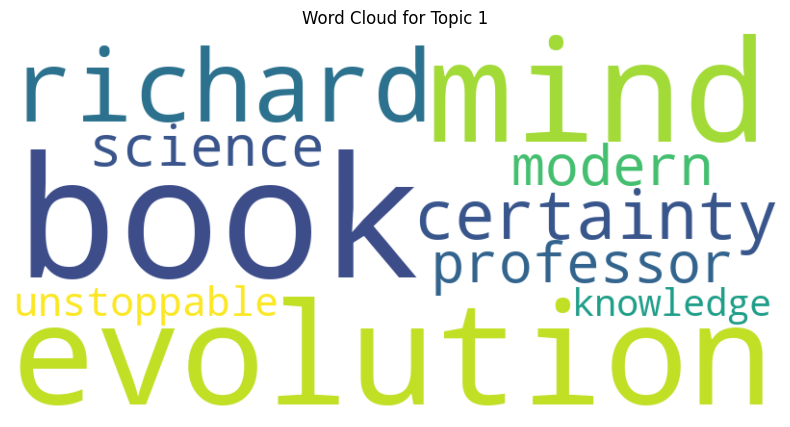

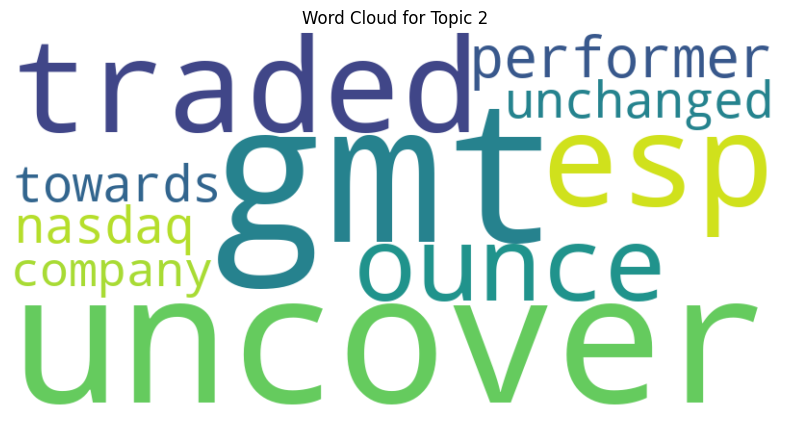

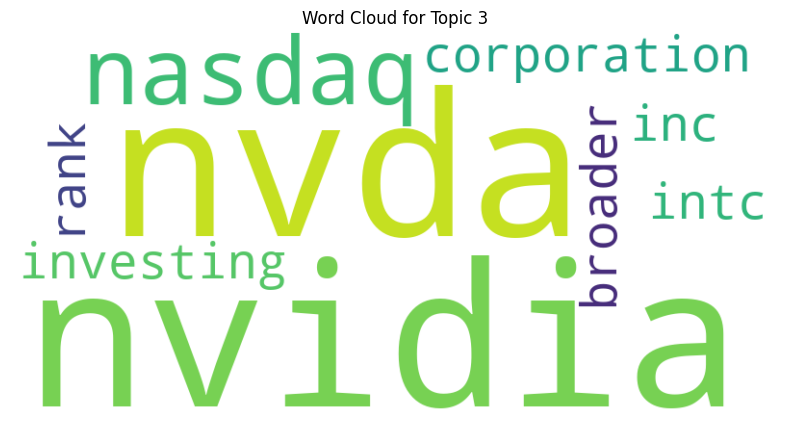

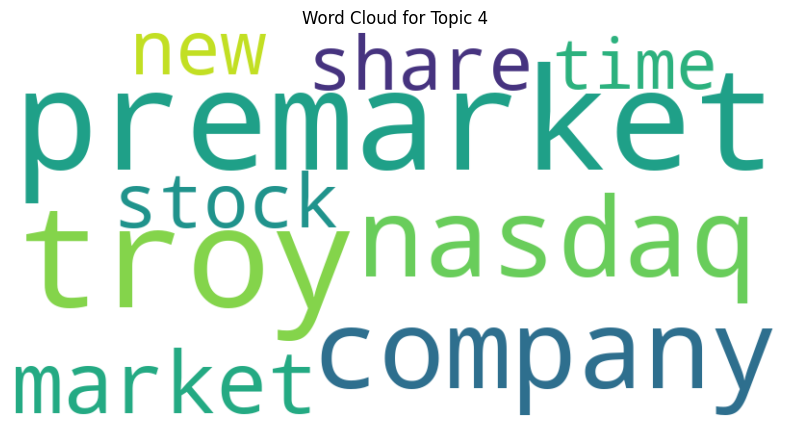

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, topic in enumerate(flsaW3.show_topics(representation='words')):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(topic))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {i+1}")
    plt.show()
